# Project: The Movie Database (TMDb) Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
[The Movie Database (TMDb)](https://www.themoviedb.org/) is an online source of movies built by its online community. In addition to metadata about movies, it offers posters and fan art for download.
The data set used for our analysis is a subset of the movies available on their website. It includes information about approximately 10,000 movies, genres, production companies, budget and revenue. 

For this project we will explore the following questions:
* What are the top 3 most common genres from the dataset?
* During which season of the year most movies tend to be released?
* Is there a correlation between seasonality and popularity?
* Which movie has the highest revenue?
* Which titles are the most and least profitable?
* During which season movies tend to have the highest revenues?
* In which season movies get the higest return on investment?
* Do movies with high revenues have higher voting average?


Let's first explore the data set:

### Data set features description 
* id - A unique identifier for each movie
* imdb_id - A unique identifier for each movie from the imdb original dataset 
* popularity - A numeric quantity specifying the movie popularity
* budget - The budget in which the movie was made
* revenue - The worldwide revenue generated by the movie
* original_title - The title of the movie before translation or adaptation
* cast - The name of lead and supporting actors
* homepage - A link to the homepage of the movie
* director - The name of the director
* tagline - Movie's tagline
* keywords - The keywords or tags related to the movie
* overview - A brief description of the movie
* runtime - The running time of the movie in minutes
* genres - The genre of the movie, Action, Comedy ,Thriller etc
* production_companies - The production house of the movie
* release_date - The date on which the movie was released
* vote_count - the count of votes recieved
* vote_average - average ratings the movie recieved
* release_year - The year on which the movie was released
* budget_adj - budget in terms of 2010 dollars, accounting for inflation over time
* revenue_adj - revenue in terms of 2010 dollars, accounting for inflation over time

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# load tmdb data
df_tmdb = pd.read_csv('tmdb_movies.csv')

In [3]:
df_tmdb.shape

(10866, 21)

In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The data set contains 10866 rows and 21 columns. At first glance, we can perform the following adjustments to start our analysis:

* Some features can be dropped as they are not relevant for our research questions
* The `release_date` feature is expressed as object data type, we will convert it to datetime
* Handle features with missing values
* Handle features that contain more than one value in each cell (i.e. cast, genre, and production_companies)

Let's take a look at the numeric columns and check if there are more inconsistencies with our data set:

In [5]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some movies have unusual runtimes, let's check which titles have more than 4 hours of duration.

In [6]:
# fetch titles which duration is higher than 4 hours
df_long_runtime = df_tmdb.query('runtime > 240')
df_long_runtime[['original_title', 'runtime']]

,original_title,runtime
415,Show Me a Hero,300
559,Childhood's End,246
1183,Ascension,282
1235,Klondike,285
1865,Life,500
2107,Carlos,338
2170,The Pillars of the Earth,421
2214,The Pacific,540
2630,Storm of the Century,257
2722,Band of Brothers,705


By perfoming a quick Google search on some of the titles, we can confirm that TV series are also part of the data set:
* [Childhood's End](https://www.themoviedb.org/tv/63647-childhood-s-end?language=en-US)
* [The Story of Film: An Odyssey](https://www.themoviedb.org/tv/45571-the-story-of-film-an-odyssey?language=en-US)

The data set doesn't contain a movie/TV show identifier for each title, therefore, any analysis on the runtime feature would have to take this into consideration.
For the purposes of our analysis, runtime feature will be dropped from the data set.

In [7]:
nb_zero_budget = df_tmdb.query('budget == 0')['budget'].count()
nb_zero_revenue = df_tmdb.query('revenue == 0')['revenue'].count()

print('Count of movies with zero budget:', nb_zero_budget, '\n'
      'Count of movies with zero revenue:', nb_zero_revenue)

Count of movies with zero budget: 5696 
Count of movies with zero revenue: 6016


In [8]:
df_zero_bug_rev = df_tmdb.query('revenue == 0 | budget == 0')
df_zero_bug_rev[['original_title', 'release_date', 'release_year', 'budget', 'revenue']].describe()

,release_year,budget,revenue
count,7011.000000,7.011000e+03,7.011000e+03
mean,2001.355299,2.212212e+06,2.523892e+06
std,13.582064,8.217805e+06,1.281855e+07
min,1960.000000,0.000000e+00,0.000000e+00
25%,1994.000000,0.000000e+00,0.000000e+00
50%,2007.000000,0.000000e+00,0.000000e+00
75%,2012.000000,0.000000e+00,0.000000e+00
max,2015.000000,1.500000e+08,2.536254e+08


In [9]:
df_zero_bug_rev[['original_title', 'release_date', 'release_year', 'budget', 'revenue']].head()

,original_title,release_date,release_year,budget,revenue
30,Mr. Holmes,6/19/15,2015,0,29355203
36,Solace,9/3/15,2015,0,22354572
48,Wild Card,1/14/15,2015,30000000,0
67,Survivor,5/21/15,2015,20000000,0
72,Beyond the Reach,4/17/15,2015,0,45895


According to the statistics generated above, more than 50% of our data set has its budget and revenue expressed as zero. Although one may infer that data wasn't available for older movies, by looking into the sample above it doesn't seem this is related to the year when the movie was released since we also see zero budget and revenues for more recent movies.

For the purposes of our analysis, these instances will not be considered when exploring the association between revenue and other properties.

### Data Cleaning

In [10]:
# convert release_date to datetime type
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

# confirm that data converted successfully
print(df_tmdb.dtypes['release_date'])

datetime64[ns]


In [11]:
df_tmdb[['original_title', 'release_date', 'release_year']]

,original_title,release_date,release_year
0,Jurassic World,2015-06-09,2015
1,Mad Max: Fury Road,2015-05-13,2015
2,Insurgent,2015-03-18,2015
3,Star Wars: The Force Awakens,2015-12-15,2015
4,Furious 7,2015-04-01,2015
...,...,...,...
10861,The Endless Summer,2066-06-15,1966
10862,Grand Prix,2066-12-21,1966
10863,Beregis Avtomobilya,2066-01-01,1966
10864,"What's Up, Tiger Lily?",2066-11-02,1966


It seems that Python found ambiguity in the date format and is parsing the wrong century. Since the century is not relevant for our analysis, and we are only interested in the season when the movie or TV show was released, let's format the date so it shows only the month portion and categorize each month to its corresponding season. 

Each season will be roughly assigned (i.e. Winter - from Jan to Mar, Spring - from Apr to Jun, and so on). 

In [12]:
# format date to show the month portion
df_tmdb['release_date'] = df_tmdb['release_date'].dt.strftime('%b')

In [13]:
# create a dictionary to map the month to its season of the year
season_dict = {
    'Jan' : 'Winter',
    'Feb' : 'Winter',
    'Mar' : 'Winter',
    'Apr' : 'Spring',
    'May' : 'Spring',
    'Jun' : 'Spring',
    'Jul' : 'Summer',
    'Aug' : 'Summer',
    'Sep' : 'Summer',
    'Oct' : 'Autumn',
    'Nov' : 'Autumn',
    'Dec' : 'Autumn'
} 

In [14]:
# replace months with seasons
df_tmdb['release_date'] = df_tmdb['release_date'].map(season_dict)
df_tmdb['release_date'].head()

0    Spring
1    Spring
2    Winter
3    Autumn
4    Spring
Name: release_date, dtype: object

In [15]:
# rename column
df_tmdb.rename(columns={'release_date': 'release_season'}, inplace=True)

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_season,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Spring,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,Spring,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Winter,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,Autumn,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,Spring,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df_tmdb[['original_title', 'release_season', 'release_year']].head()

,original_title,release_season,release_year
0,Jurassic World,Spring,2015
1,Mad Max: Fury Road,Spring,2015
2,Insurgent,Winter,2015
3,Star Wars: The Force Awakens,Autumn,2015
4,Furious 7,Spring,2015


In [17]:
# drop columns
df_tmdb.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 
              'runtime', 'production_companies'], axis=1, inplace=True)

The inflation-adjusted budget and revenues were kept over those from when the movie was released, as it provides a more realistic comparison of how financial performance has been.

In [18]:
pd.options.display.float_format = '{:,}'.format
df_tmdb[['original_title', 'budget_adj', 'revenue_adj']].head()

,original_title,budget_adj,revenue_adj
0,Jurassic World,"137,999,939.280026","1,392,445,892.5238"
1,Mad Max: Fury Road,"137,999,939.280026","348,161,292.489031"
2,Insurgent,"101,199,955.47201899","271,619,025.407628"
3,Star Wars: The Force Awakens,"183,999,919.040035","1,902,723,129.80182"
4,Furious 7,"174,799,923.08803302","1,385,748,801.47052"


`budget_adj` and `revenue_adj` features are stored as floats and contain 6 decimal digits making it harder to read. For readability, let's round them to a maximum of two decimal places.

In [19]:
df_tmdb['budget_adj'] = round(df_tmdb['budget_adj'], 2)
df_tmdb['revenue_adj'] = round(df_tmdb['revenue_adj'], 2)

df_tmdb[['original_title', 'budget_adj', 'revenue_adj']].head()

,original_title,budget_adj,revenue_adj
0,Jurassic World,"137,999,939.28","1,392,445,892.52"
1,Mad Max: Fury Road,"137,999,939.28","348,161,292.49"
2,Insurgent,"101,199,955.47","271,619,025.41"
3,Star Wars: The Force Awakens,"183,999,919.04","1,902,723,129.8"
4,Furious 7,"174,799,923.09","1,385,748,801.47"


In [20]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
release_season    10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 849.0+ KB


Now that all the irrelevant features were drop, and data transformation was performed where needed. It's time to check how many blank values we have in our dataset.

In [21]:
# view missing value count for each feature
total = df_tmdb.isnull().sum().sort_values(ascending=False)
percent = (df_tmdb.isnull().sum() / df_tmdb.isnull().count()).sort_values(ascending=False)
df_null_data = pd.concat([total, round(percent, 3)], axis=1, keys=['total', 'percent'])
df_null_data

,total,percent
director,44,0.004
genres,23,0.002
revenue_adj,0,0.0
budget_adj,0,0.0
release_year,0,0.0
vote_average,0,0.0
vote_count,0,0.0
release_season,0,0.0
original_title,0,0.0
popularity,0,0.0


There are only two columns with missing data in our dataset: `director` and `genres`, both representing less than 1% of the entire data. Since these are a very small portion, deleting these observations will not affect our analysis.

In [22]:
# drop rows with any null values
df_tmdb.dropna(inplace=True)

In [23]:
df_tmdb.isnull().sum()

popularity        0
original_title    0
director          0
genres            0
release_season    0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Having duplicates in the dataset also impairs our analysis. Let's check how many observations there are and drop them if possible.

In [24]:
# view duplicated rows
duplicate = df_tmdb[df_tmdb.duplicated()]
duplicate

,popularity,original_title,director,genres,release_season,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,TEKKEN,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Winter,110,5.0,2010,"30,000,000.0","967,000.0"


In [25]:
# drop duplicate row
df_tmdb.drop_duplicates(inplace=True)
sum(df_tmdb.duplicated())

0

In [26]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
release_season    10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 928.1+ KB


Now that the dataset is clean, let's export to a new csv file: `tmdb_clean.csv`.

In [27]:
# exporting the cleaned dataset to a csv file
df_tmdb.to_csv('tmdb_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### What are the top 3 most common genres from the dataset?

In [28]:
df_tmdb[['original_title', 'genres']].head()

,original_title,genres
0,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Action|Crime|Thriller


A movie or TV show may be classified with more than one genre, and for those cases they are separated by the `|` character. For this reason, we need to perform a number of steps to be able to count how many titles there are for each genre.

The `genres` feature is originally represented as one string. If we want to count how many titles there are for each genre, We need to have a clear separation of each genre. To perform this transformation, we will use the `|` as a separator.

We will then store the counts in a dictionary, mapping each genre to its number of occurrences in the dataset.

In [29]:
ls_genres = []
genre_dict = {}

for each in df_tmdb['genres']:
    ls_genres.append(each.split("|"))

for item in ls_genres:
    for i in item:
        if i in genre_dict:
            genre_dict[i] += 1
        else:
            genre_dict[i] = 1
            
genre_dict

{'Action': 2378,
 'Adventure': 1466,
 'Science Fiction': 1223,
 'Thriller': 2904,
 'Fantasy': 912,
 'Crime': 1353,
 'Western': 164,
 'Drama': 4754,
 'Family': 1223,
 'Animation': 692,
 'Comedy': 3782,
 'Mystery': 809,
 'Romance': 1708,
 'War': 270,
 'History': 332,
 'Music': 402,
 'Horror': 1636,
 'Documentary': 509,
 'TV Movie': 162,
 'Foreign': 185}

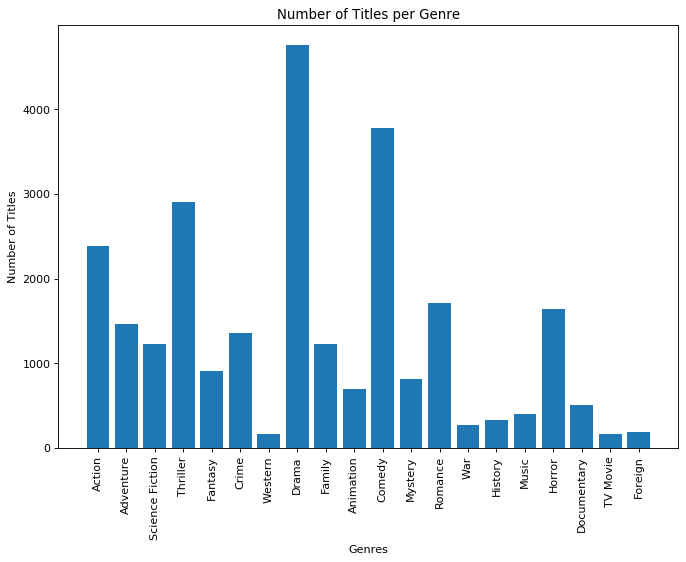

In [30]:
plt.figure(figsize=(10, 7), dpi=80)
plt.bar(range(len(genre_dict)), list(genre_dict.values()), align='center')
plt.xticks(range(len(genre_dict)), list(genre_dict.keys()), rotation=90)
plt.title('Number of Titles per Genre')
plt.ylabel('Number of Titles')
plt.xlabel('Genres');

**Drama** is the most common genre in our dataset, followed by **Comedy** and **Thriller**.

### During which season of the year most movies tend to be released?

In [31]:
# how many titles were released in each season
df_titles_season = df_tmdb.groupby(['release_season'])['original_title'].count()

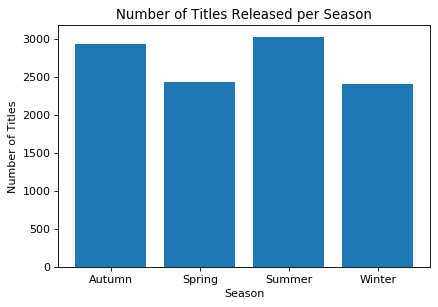

In [32]:
plt.figure(dpi=80)
plt.bar(df_titles_season.index, df_titles_season)
plt.title('Number of Titles Released per Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles');

**Summer** and **Autumn** are seasons were most of the titles tend to be released. This may be due to the holidays season and the period when most prestigious movie awards like Oscar and BAFTA are taking place.

### Is there a correlation between seasonality and popularity?


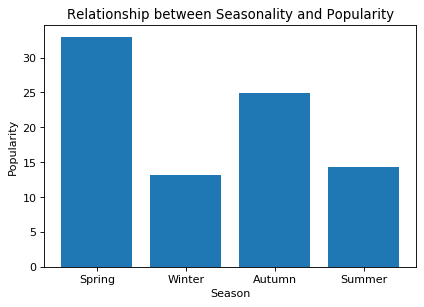

In [33]:
plt.figure(dpi=80)
plt.bar(df_tmdb.release_season, df_tmdb.popularity);
plt.title('Relationship between Seasonality and Popularity')
plt.xlabel('Season')
plt.ylabel('Popularity');

Although most of the titles are released during the Summer, those released in Spring get the highest rating in popularity. 

### Which movie has the highest revenue? 

To explore this question, we will search for the title that has the highest revenue in the entire data set by applying the `idxmax()` function.

In [34]:
highest_revenue = df_tmdb.loc[df_tmdb['revenue_adj'].idxmax()]
highest_revenue

popularity                                        9.432768
original_title                                      Avatar
director                                     James Cameron
genres            Action|Adventure|Fantasy|Science Fiction
release_season                                      Autumn
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
budget_adj                                  240,886,902.89
revenue_adj                               2,827,123,750.41
Name: 1386, dtype: object

Avatar is the movie that has the highest box-office earnings, but is Avatar the most profitable movie from the dataset? 

### Which titles are the most and least profitable?

If we want to evaluate a title's return on investment (ROI), we will need to calculate the profit and then the ratio between profit and budget.

The is profit calculated by subtracting the budget from the revenue. To calculate the ROI, the profit is divided by the budget invested.

To continue our analysis, we will create a new column in the data set, `roi`, and then confirm if Avatar is the title that has the highest ROI.

In [35]:
profit = df_tmdb['revenue_adj'] - df_tmdb['budget_adj']
roi = round((profit / df_tmdb['budget_adj']) * 100, 2)

df_tmdb['roi'] = roi

df_tmdb.head()

,popularity,original_title,director,genres,release_season,vote_count,vote_average,release_year,budget_adj,revenue_adj,roi
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Spring,5562,6.5,2015,"137,999,939.28","1,392,445,892.52",909.02
1,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Spring,6185,7.1,2015,"137,999,939.28","348,161,292.49",152.29
2,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Winter,2480,6.3,2015,"101,199,955.47","271,619,025.41",168.4
3,11.173103999999999,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Autumn,5292,7.5,2015,"183,999,919.04","1,902,723,129.8",934.09
4,9.335014,Furious 7,James Wan,Action|Crime|Thriller,Spring,2947,7.3,2015,"174,799,923.09","1,385,748,801.47",692.76


### Finding the most profitable movie

In [36]:
highest_roi = df_tmdb.loc[df_tmdb['roi'].idxmax()]
highest_roi

popularity             3.927333
original_title       Mr. Holmes
director            Bill Condon
genres            Mystery|Drama
release_season           Spring
vote_count                  425
vote_average                6.4
release_year               2015
budget_adj                  0.0
revenue_adj       27,006,774.88
roi                         inf
Name: 30, dtype: object

As described earlier, more than 50% of our data has it's budget set as zero, therefore, we can not calculate the ROI for these titles (division by zero).

To answer this and the following question, we will explore a subset of the data. We are interested on those cases where budget and revenue figures are present. 

To perform this analysis, first we will query the data set to find movies and TV shows with non-zero budget and non-zero revenue data, then we will be able to calculate the Return on Investment (ROI):

In [37]:
df_zero_bud_rev = df_tmdb.query('budget_adj != 0 & revenue_adj != 0')
highest_roi = df_zero_bud_rev.loc[df_zero_bud_rev['roi'].idxmax()]

highest_roi

popularity                                     0.772494
original_title                  The Karate Kid, Part II
director                               John G. Avildsen
genres            Adventure|Drama|Action|Romance|Family
release_season                                   Spring
vote_count                                          211
vote_average                                        5.8
release_year                                       1986
budget_adj                                        224.8
revenue_adj                              228,988,593.74
roi                                      101,863,153.44
Name: 10495, dtype: object

**The Karate Kid, Part II** is the most profitable movie from the dataset, however if we look closely into its features, we can see that the inflation-adjusted budget is unusually low.

### Finding the least profitable movie

In [38]:
lowest_roi = df_zero_bud_rev.loc[df_zero_bud_rev['roi'].idxmin()]

lowest_roi

popularity                                             0.352054
original_title                   Dr. Horrible's Sing-Along Blog
director                                            Joss Whedon
genres            Adventure|Action|Comedy|Science Fiction|Music
release_season                                           Summer
vote_count                                                  140
vote_average                                                7.7
release_year                                               2008
budget_adj                                           202,557.33
revenue_adj                                                3.04
roi                                                      -100.0
Name: 3239, dtype: object

The result shows that **Dr. Horrible's Sing-Along Blog** is the least profitable movie in the dataset. It's ROI is -100% due to its unusually low revenue. Let's inspect the dataframe to find if there are more movies with ROI of -100%.

In [39]:
df_neg_roi = df_zero_bud_rev.query('roi == -100')
df_neg_roi['roi'].count()

13

In [40]:
df_neg_roi[['original_title', 'budget_adj', 'revenue_adj', 'roi']]

,original_title,budget_adj,revenue_adj,roi
3239,Dr. Horrible's Sing-Along Blog,"202,557.33",3.04,-100.0
4970,Brother Bear,"118,535,264.48",296.34,-100.0
5060,In the Cut,"14,224,231.74",27.26,-100.0
5067,Shattered Glass,"7,112,115.87",2.37,-100.0
6707,Charlotte's Web,"91,941,878.45",155.76,-100.0
7158,Chasing Liberty,"26,552,244.2",13.85,-100.0
7506,Death at a Funeral,"9,465,017.24",48.38,-100.0
8142,Mallrats,"8,585,801.2",2.86,-100.0
8226,Never Talk to Strangers,"9,158,187.95",8.59,-100.0
8523,Bordello of Blood,"20,853,251.08",6.95,-100.0


There are 13 instances where ROI is -100%, all of them with inflation-adjusted revenue extremely low.

### During which season movies tend to have the highest revenues?

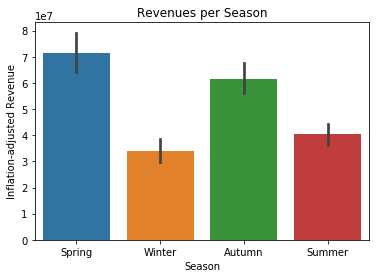

In [41]:
ax = sns.barplot(
    x='release_season', 
    y='revenue_adj', 
    data=df_tmdb)

ax.set_title('Revenues per Season')
ax.set(xlabel='Season')
ax.set(ylabel='Inflation-adjusted Revenue');

As with popularity, **Spring** and **Autumn** are the seasons when most of the high-revenue titles are released. Let's check if the same applies to ROI.

### In which season movies get the higest return on investment?

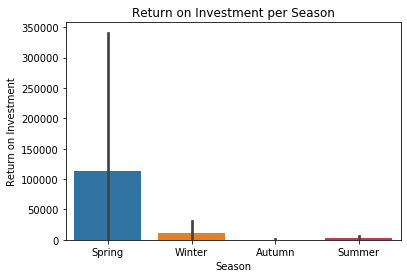

In [42]:
ax = sns.barplot(
    x='release_season', 
    y='roi', 
    data=df_zero_bud_rev)

ax.set_title('Return on Investment per Season')
ax.set(xlabel='Season')
ax.set(ylabel='Return on Investment');

Movies released during **Spring** also have the highest ROI, followed by Winter and Summer. Although **Autumn** appears as the second season where most popular and high revenues titles are released, its ROI is extremely low showing zero or near zero performance.   

### Do movies with high revenues have higher voting average?

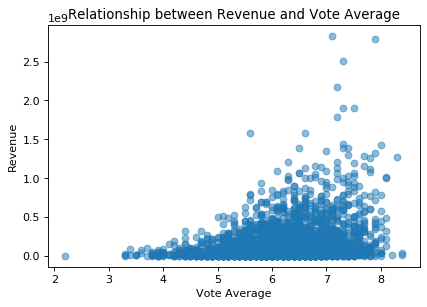

In [43]:
plt.figure(dpi=80)
plt.scatter(df_zero_bud_rev.vote_average, df_zero_bud_rev.revenue_adj, alpha=0.5)
plt.title('Relationship between Revenue and Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Revenue');

The scatter plot above gives us an idea about the relationship between 'revenue' and 'vote_average'. We can see that there is a positive correlation between these two variables. The highest the revenue a title receives, the higher is the voting rate.

<a id='limitations'></a>
## Limitations

The findings of this analysis have to be seen in light of some limitations. (1) The methodology used to calculate the 'popularity' and 'vote_average' variables is not known. (2) Additionally, the dataset is composed of both Movies and TV series, and we cannot easily distinguish them. These two types of media are fundamentally different as they have different runtimes, release schedules and audience reach. 
(3) A large amount of titles don't contain budget and revenue data. Any analysis using these variables, even when using a subset of the data including only non-missing observations, is not accurate and is not representative of the whole dataset.
(4) Finally, we also found titles with unusually low budget and revenue. Therefore, analysis of profitability and/or ROI may be innacurate, and may give us the wrong answer about which title has the highest and lowest return on investment.

To overcome these limitations in future analysis, we can search for other sources to complete the dataset. We can search for other movies databases and/or scrap the original webpages of movies to get the correct data.  

<a id='conclusions'></a>
## Conclusions

Throughout this analysis we practiced all the steps in the Data Analysis process. In the Introduction and Data Wrangling sections, we raised a number of questions, then studied the dataset and applied transformations where needed.

In the Exploratory Data Analysis section, we concluded that 'Drama' is the most common genre in our dataset, followed by 'Comedy' and 'Thriller'.

We also found that **Summer** and **Autumn** are seasons when most of the titles were released. Probably because Summer is a holiday season and Autumn is the season that precedes the most prestigious movie awards such as Oscar and BAFTA.

Although 'Avatar' is the movie that has the highest box-office earnings, 'The Karate Kid, Part II' is the most profitable movie from the dataset. The inflation-adjusted budget for this title is unusually low, therefore this analysis may not be accurate.
The analysis also shows that 'Dr. Horrible's Sing-Along Blog' is the least profitable title in the dataset with ROI of -100% -  its revenue is also unusually low and there are 12 more titles which its ROI is -100%.

**Spring** and **Autumn** are the seasons when most of the high-revenue titles are released. We cannot say the same about a titles' ROI. Titles released in Autumn has a return on investment of zero or near zero performance. Movies released during Spring also have the highest ROI, followed by Winter and Summer. 

Finally, we learned that there is a positive correlation between 'revenue_adj' and 'vote_average'. Titles with highest revenues also have the highest voting rate.

